## Crea tu propia rendija

### Paso 1

Ir a [Google Drawing Tool](https://docs.google.com/drawings)

### Paso 2

Dibujar la rendija y descargarla

<img src="RendijaPrueba.jpg" width=300pt align="center"/>

### Paso 3 

Invertir colores 

<img src="RendijaPruebaFinal.jpg" width=300pt align="center"/>

In [1]:
import numpy as np
from scipy.fft import fftfreq,fft2,ifft2
import matplotlib.pyplot as plt
import cv2

In [20]:
def calcular_U(U0, xv, yv, λ, z):
    A = fft2(U0)
    kx = 2 * np.pi * fftfreq(len(x), np.diff(x)[0])
    kxv, kyv = np.meshgrid(kx,kx)
    k = 2*np.pi/λ
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

def graficar_U(xv,yv,U):
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xv,yv,np.abs(U),cmap="inferno")    
    
def U_blanco(xv,yv,U0,z):
    λ1 = 645 * 1e-9 # Rojo
    λ2 = 510 * 1e-9 # Verde
    λ3 = 440 * 1e-9 # Azul

    U1 = calcular_U(U0, xv, yv, λ1, z) # Propagación del rojo
    U2 = calcular_U(U0, xv, yv, λ2, z) # Propagación del verde
    U3 = calcular_U(U0, xv, yv, λ3, z) # Propagación del azul

    U = np.zeros((U1.shape[0],U1.shape[1],3)) # Imagen vacía
    U[:,:,0] = np.abs(U1) # Parte roja de la imagen 
    U[:,:,1] = np.abs(U2) # Parte verde de la imagen
    U[:,:,2] = np.abs(U3) # Parte azul de la imagen 

    U = np.sqrt(U)
    umbral = np.max(U)
    U = U/umbral

    plt.figure(figsize=(7,7))
    plt.imshow(U)

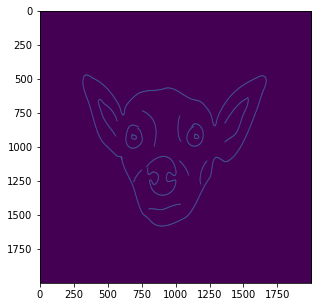

In [2]:
kk = cv2.imread("RendijaPruebaFinal.jpg")
kk = np.pad(kk,200,mode="constant")
kk = cv2.resize(kk,dsize=(2000,2000),interpolation=cv2.INTER_CUBIC)

U0 = np.array(kk).sum(axis=2).astype(float)

plt.figure(figsize=(5,5))
plt.imshow(U0)

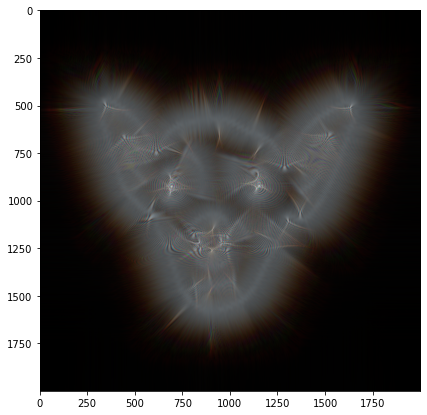

In [21]:
x = np.linspace(-2,2,2000) * 1e-3 
xv, yv = np.meshgrid(x,x)

U_blanco(xv,yv,U0,z=0.35*1e-2)